### ADTA Final Project Decision Tree
#### MARISSA MCKEE

This project is based on the data set called ERIMdata.xlsx that includes about 3,000 households in two midwestern cities in the United States. The data contain demographic information such as household incomes, number of household members, education levels of the heads of households as well as information on the purchases of several retail products such as frozen dinners and yogurt. The data were collected between 1985 and 1988 by a marketing research firm, AC Nielsen. 


Your assignment is first to propose a business analytics plan based on the CRISP-DM framework and identify and complete the appropriate tasks for each of the six CRISP-DM phases. The project deliverables include a final written report and an oral presentation that should follow the outline shown below. 

In [1]:
import pandas as pd
import pyreadstat
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

C:\Users\mckee\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# Import ERIMDataClean.csv  
file = 'ERIMDataClean.csv'
df = pd.read_csv(file, sep = ',')
df.head()

,HH_ID,ResType,ResStatus,HHInc,HHNbr,MWrkHrs,MEdu,FWrkHrs,FEdu,FBirth,...,ResType4,ResType5,ResStatus1,ResStatus2,MUndergrad,MGrad,FUndergrad,FGrad,FAge,MAge
0,1100032,3,1,11,2,40,8,40,9,1938,...,0,0,1,0,0,0,1,0,50,53
1,1100107,1,2,3,3,0,0,40,7,1942,...,0,0,0,1,0,0,0,0,46,46
2,1100131,3,1,9,4,40,9,40,8,1949,...,0,0,1,0,1,0,0,0,39,39
3,1100172,1,2,2,1,0,0,0,9,1921,...,0,0,0,1,0,0,1,0,67,67
4,1100180,3,1,8,4,40,9,38,8,1946,...,0,0,1,0,1,0,0,0,42,51


In [3]:
# View the columns in the dataframe
df.columns

Index(['HH_ID', 'ResType', 'ResStatus', 'HHInc', 'HHNbr', 'MWrkHrs', 'MEdu',
       'FWrkHrs', 'FEdu', 'FBirth', 'F_Rel', 'MBirth', 'M_Rel', 'Cable',
       'Cats', 'Dogs', 'YogExp', 'DinExp', 'HHIn1', 'HHIn2', 'HHIn3', 'HHIn4',
       'HHIn5', 'HHIn6', 'HHIn7', 'HHIn8', 'HHIn9', 'HHIn10', 'HHIn11',
       'HHIn12', 'HHIn13', 'ResType1', 'ResType2', 'ResType3', 'ResType4',
       'ResType5', 'ResStatus1', 'ResStatus2', 'MUndergrad', 'MGrad',
       'FUndergrad', 'FGrad', 'FAge', 'MAge'],
      dtype='object')

In [4]:
# Check for nulls
df.isnull().any()

HH_ID         False
ResType       False
ResStatus     False
HHInc         False
HHNbr         False
MWrkHrs       False
MEdu          False
FWrkHrs       False
FEdu          False
FBirth        False
F_Rel         False
MBirth        False
M_Rel         False
Cable         False
Cats          False
Dogs          False
YogExp        False
DinExp        False
HHIn1         False
HHIn2         False
HHIn3         False
HHIn4         False
HHIn5         False
HHIn6         False
HHIn7         False
HHIn8         False
HHIn9         False
HHIn10        False
HHIn11        False
HHIn12        False
HHIn13        False
ResType1      False
ResType2      False
ResType3      False
ResType4      False
ResType5      False
ResStatus1    False
ResStatus2    False
MUndergrad    False
MGrad         False
FUndergrad    False
FGrad         False
FAge          False
MAge          False
dtype: bool

In [5]:
# # Null handling 
# df = df.fillna(method='ffill')
df.head(15)

,HH_ID,ResType,ResStatus,HHInc,HHNbr,MWrkHrs,MEdu,FWrkHrs,FEdu,FBirth,...,ResType4,ResType5,ResStatus1,ResStatus2,MUndergrad,MGrad,FUndergrad,FGrad,FAge,MAge
0,1100032,3,1,11,2,40,8,40,9,1938,...,0,0,1,0,0,0,1,0,50,53
1,1100107,1,2,3,3,0,0,40,7,1942,...,0,0,0,1,0,0,0,0,46,46
2,1100131,3,1,9,4,40,9,40,8,1949,...,0,0,1,0,1,0,0,0,39,39
3,1100172,1,2,2,1,0,0,0,9,1921,...,0,0,0,1,0,0,1,0,67,67
4,1100180,3,1,8,4,40,9,38,8,1946,...,0,0,1,0,1,0,0,0,42,51
5,1100198,1,2,2,1,0,0,0,5,1903,...,0,0,0,1,0,0,0,0,85,85
6,1100255,3,1,2,1,0,0,0,3,1921,...,0,0,1,0,0,0,0,0,67,67
7,1100289,3,1,3,2,0,9,0,5,1916,...,0,0,1,0,1,0,0,0,72,78
8,1100297,3,1,7,2,20,5,12,5,1925,...,0,0,1,0,0,0,0,0,63,66
9,1100313,3,1,6,3,0,0,40,8,1951,...,0,0,1,0,0,0,0,0,37,37


In [6]:
#split dataset in features and target variable
feature_cols = ['HH_ID', 'ResType', 'ResStatus', 'HHInc', 'HHNbr', 'MWrkHrs', 'MEdu',
           'FWrkHrs', 'FEdu', 'FBirth', 'F_Rel', 'MBirth', 'M_Rel', 'Cable',
           'Cats', 'Dogs', 'YogExp', 'DinExp', 'HHIn1', 'HHIn2', 'HHIn3', 'HHIn4',
           'HHIn5', 'HHIn6', 'HHIn7', 'HHIn8', 'HHIn9', 'HHIn10', 'HHIn11',
            'HHIn12', 'HHIn13', 'ResType1', 'ResType2', 'ResType3', 'ResType4',
           'ResType5', 'ResStatus1', 'ResStatus2', 'MUndergrad', 'MGrad',
           'FUndergrad', 'FGrad', 'FAge', 'MAge']

X = df[feature_cols] # Features
y = df.ResType # Target variable

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [9]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


### Visualize Results

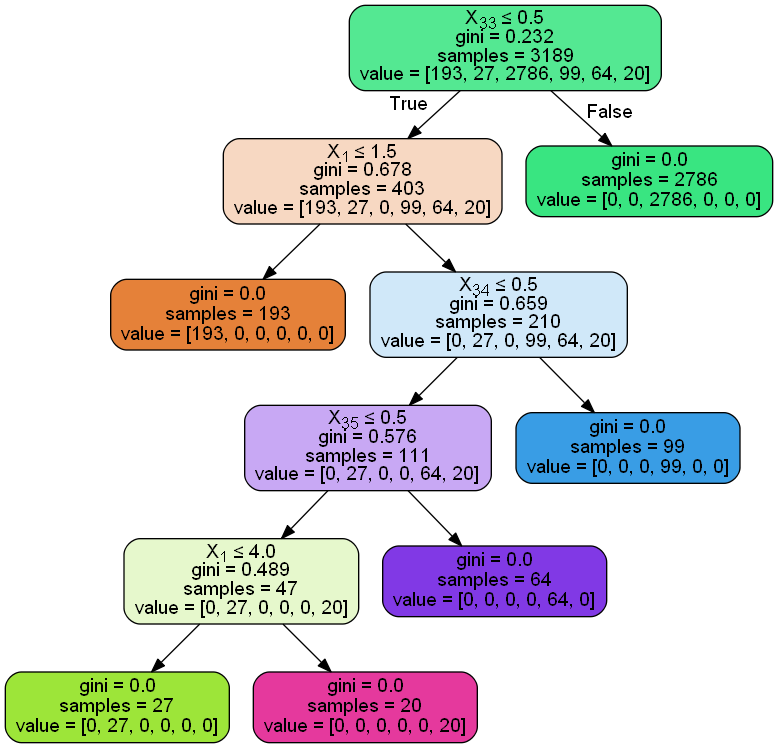

In [10]:
dtree=DecisionTreeClassifier()
dtree.fit(X,y)

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

### Optimize Decision Tree Results

In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9738766980146291


In [13]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True, feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('diagnoses.png')
# Image(graph.create_png())